In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from chorogrid import Colorbin, Chorogrid
import csv
import warnings
import folium
from folium import plugins

In [4]:
#!pip install chorogrid

## 1 Setting the context (map visualization)

Before we dive into exploring the data, we'll want to set the context of the analysis. One good way to do this is with exploratory charts or maps.

In [5]:
map_data = pd.read_csv('mapData.csv')

In [6]:
map_data.head(2)

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,Average,lat,long
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,590400,596000,602400,608500,615000,621200,626600.0,626600,40.728224,-73.794852
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,584900,587400,590000,593000,598300,604900,610400.0,765400,34.052234,-118.243685


In [7]:
map_data.dtypes

RegionID        int64
RegionName     object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
1998-03       float64
               ...   
2014-10         int64
2014-11         int64
2014-12         int64
2015-01         int64
2015-02         int64
2015-03         int64
2015-04         int64
2015-05         int64
2015-06         int64
2015-07         int64
2015-08         int64
2015-09         int64
2015-10         int64
2015-11         int64
2015-12   

In [8]:
map_data.shape

(10424, 258)

In [9]:
#let's summarize the main statistics of each parameters
map_data.describe(include='all')

C:\Users\Saleban\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,Average,lat,long
count,10424.000000,10424,10424,9838,10424,10424.000000,7.478000e+03,7.573000e+03,7.609000e+03,7.611000e+03,...,1.042400e+04,1.042400e+04,1.042400e+04,1.042400e+04,1.042400e+04,1.042400e+04,1.040800e+04,1.042400e+04,10424.000000,10424.000000
unique,NaN,8036,50,556,912,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Franklin,PA,New York,Washington,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14,1104,603,190,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,85869.318688,NaN,NaN,NaN,NaN,5212.500000,1.217134e+05,1.217784e+05,1.216544e+05,1.217169e+05,...,2.408614e+05,2.416046e+05,2.426240e+05,2.440774e+05,2.457590e+05,2.474649e+05,2.490089e+05,3.359418e+05,38.771835,-87.962434
std,127219.581157,NaN,NaN,NaN,NaN,3009.293937,8.038858e+04,7.986205e+04,7.977441e+04,7.984090e+04,...,2.678735e+05,2.674314e+05,2.683117e+05,2.704875e+05,2.733484e+05,2.763433e+05,2.786030e+05,3.352378e+05,4.856212,15.546660
min,3305.000000,NaN,NaN,NaN,NaN,1.000000,1.880000e+04,1.880000e+04,1.880000e+04,1.910000e+04,...,3.170000e+04,3.150000e+04,3.230000e+04,3.350000e+04,3.440000e+04,3.450000e+04,3.450000e+04,0.000000e+00,19.542915,-157.824396
25%,19495.000000,NaN,NaN,NaN,NaN,2606.750000,NaN,NaN,NaN,NaN,...,1.225750e+05,1.230000e+05,1.235000e+05,1.241000e+05,1.248750e+05,1.257000e+05,NaN,1.670000e+05,35.671082,-92.344731
50%,35771.500000,NaN,NaN,NaN,NaN,5212.500000,NaN,NaN,NaN,NaN,...,1.751000e+05,1.756500e+05,1.765000e+05,1.771000e+05,1.783500e+05,1.795000e+05,NaN,2.559500e+05,40.173960,-83.677393
75%,52766.250000,NaN,NaN,NaN,NaN,7818.250000,NaN,NaN,NaN,NaN,...,2.717250e+05,2.728000e+05,2.737250e+05,2.750000e+05,2.764000e+05,2.778000e+05,NaN,3.943250e+05,41.922404,-76.727745


In [10]:
#setting the map
#houses_map = folium.Map(location=[map_data['lat'].mean(), map_data['long'].mean()], zoom_start=4)
#marker_cluster = folium.MarkerCluster().add_to(houses_map)
#MAX_RECORDS = 100
#for name, row in map_data.iterrows():
#    folium.Marker([row["lat"],row["long"]],popup="Average {0}$ is:".format(row['Average'])).add_to(marker_cluster)
#houses_map.create_map('houses.html')
#houses_map

In [11]:
zipcode_data = map_data.groupby('CountyName').aggregate(np.mean)
zipcode_data.reset_index(inplace=True)

map_data['count'] = 1
count_houses_zipcode = map_data.groupby('CountyName').sum()
count_houses_zipcode.reset_index(inplace=True)
count_houses_zipcode = count_houses_zipcode[['CountyName','count']]
map_data.drop(['count'],axis =1,inplace=True)

zipcode_data = pd.merge(zipcode_data,count_houses_zipcode,how='left',on=['CountyName'])
zipcode_data.head(2)

,CountyName,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,Average,lat,long,count
0,Acadia,20612.333333,2981.333333,66900.0,67300.0,67700.0,67000.0,66500.0,67200.0,67900.0,...,110833.333333,111733.333333,113233.333333,114266.666667,114400.0,113800.0,136100.000000,30.229735,-92.381362,3
1,Ada,23933.833333,2584.166667,134680.0,135100.0,135580.0,136000.0,136300.0,136380.0,136280.0,...,223833.333333,224650.000000,225300.000000,226033.333333,226850.0,227750.0,339983.333333,43.478767,-116.242030,6


In [12]:
def show_map_counties(col):
    geo_path = 'usa_counties.csv'
    zipcode = folium.Map(location=[map_data['lat'].mean(), map_data['long'].mean()], zoom_start=4)
    zipcode.geo_json(geo_path = geo_path, data=zipcode_data, columns = ['CountyName',col], key_on='feature.properties.ZCTA5CE10',fill_color='OrRd',fill_opacity=0.9,line_opacity=.02) 
    zipcode.save(col+'.html')
    return zipcode

In [13]:
#show_map_counties('Average')

In [14]:
#Input data files are availabe in the "houseprice.csv" directory
df = pd.read_csv('house_prices.csv')
df = df.dropna(thresh=48)

In [15]:
#display head()
df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,Average
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,580500.0,585100.0,590400,596000,602400,608500,615000,621200,626600.0,626600
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,577600.0,581800.0,584900,587400,590000,593000,598300,604900,610400.0,765400
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,206000.0,205800.0,205700,206800,208000,208800,210400,212400,214100.0,323800
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,125700.0,125800.0,126800,129000,130900,131600,132000,132500,133200.0,183200
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,191400.0,192900.0,195200,197400,198700,199600,201100,202900,204500.0,291700


In [16]:
#let's get the number of attributes and instances data point
instance_count, attr_count = df.shape
print('Number of instances: ', instance_count)
print('Number of features: ', attr_count)

Number of instances:  10424
Number of features:  256


### Distributions of each attributes
let's begin by exploring our dataset attributes (columns)

In [17]:
df.columns

Index(['RegionID', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank',
       '1996-04', '1996-05', '1996-06', '1996-07',
       ...
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', 'Average'],
      dtype='object', length=256)

#### Statistical overview

In [18]:
df.describe()

C:\Users\Saleban\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,Average
count,10424.000000,10424.000000,7.478000e+03,7.573000e+03,7.609000e+03,7.611000e+03,7.619000e+03,7.619000e+03,7.619000e+03,7.626000e+03,...,1.040500e+04,1.040500e+04,1.042400e+04,1.042400e+04,1.042400e+04,1.042400e+04,1.042400e+04,1.042400e+04,1.040800e+04,1.042400e+04
mean,85869.318688,5212.500000,1.217134e+05,1.217784e+05,1.216544e+05,1.217169e+05,1.217845e+05,1.218901e+05,1.220440e+05,1.223470e+05,...,2.390398e+05,2.399747e+05,2.408614e+05,2.416046e+05,2.426240e+05,2.440774e+05,2.457590e+05,2.474649e+05,2.490089e+05,3.359418e+05
std,127219.581157,3009.293937,8.038858e+04,7.986205e+04,7.977441e+04,7.984090e+04,7.983451e+04,7.989195e+04,8.002735e+04,8.023923e+04,...,2.694764e+05,2.691983e+05,2.678735e+05,2.674314e+05,2.683117e+05,2.704875e+05,2.733484e+05,2.763433e+05,2.786030e+05,3.352378e+05
min,3305.000000,1.000000,1.880000e+04,1.880000e+04,1.880000e+04,1.910000e+04,1.960000e+04,2.000000e+04,2.060000e+04,2.080000e+04,...,3.100000e+04,3.160000e+04,3.170000e+04,3.150000e+04,3.230000e+04,3.350000e+04,3.440000e+04,3.450000e+04,3.450000e+04,0.000000e+00
25%,19495.000000,2606.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.225750e+05,1.230000e+05,1.235000e+05,1.241000e+05,1.248750e+05,1.257000e+05,NaN,1.670000e+05
50%,35771.500000,5212.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.751000e+05,1.756500e+05,1.765000e+05,1.771000e+05,1.783500e+05,1.795000e+05,NaN,2.559500e+05
75%,52766.250000,7818.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.717250e+05,2.728000e+05,2.737250e+05,2.750000e+05,2.764000e+05,2.778000e+05,NaN,3.943250e+05
max,737791.000000,10424.000000,2.574500e+06,2.553100e+06,2.541500e+06,2.531700e+06,2.526600e+06,2.530400e+06,2.535100e+06,2.543800e+06,...,1.080000e+07,1.077520e+07,1.073020e+07,1.078860e+07,1.091830e+07,1.101350e+07,1.110910e+07,1.128480e+07,1.142260e+07,1.142260e+07


### Missing is bad :(
Well, we can see from the above cell we have some missing data values and this are represented by np.NaN. We can use pd.isnull(df).any() to get overview of what we are missing

In [19]:
pd.isnull(df).any()

RegionID      False
RegionName    False
State         False
Metro          True
CountyName    False
SizeRank      False
1996-04        True
1996-05        True
1996-06        True
1996-07        True
1996-08        True
1996-09        True
1996-10        True
1996-11        True
1996-12        True
1997-01        True
1997-02        True
1997-03        True
1997-04        True
1997-05        True
1997-06        True
1997-07        True
1997-08        True
1997-09        True
1997-10        True
1997-11        True
1997-12        True
1998-01        True
1998-02        True
1998-03        True
              ...  
2014-08       False
2014-09       False
2014-10       False
2014-11       False
2014-12       False
2015-01       False
2015-02       False
2015-03       False
2015-04       False
2015-05       False
2015-06       False
2015-07       False
2015-08       False
2015-09       False
2015-10       False
2015-11       False
2015-12       False
2016-01       False
2016-02        True


In [20]:
#Let's count the missing values in our data
pd.isnull(df).sum()

RegionID         0
RegionName       0
State            0
Metro          586
CountyName       0
SizeRank         0
1996-04       2946
1996-05       2851
1996-06       2815
1996-07       2813
1996-08       2805
1996-09       2805
1996-10       2805
1996-11       2798
1996-12       2798
1997-01       2777
1997-02       2347
1997-03       2306
1997-04       2305
1997-05       2305
1997-06       2304
1997-07       2304
1997-08       2181
1997-09       2178
1997-10       2175
1997-11       2172
1997-12       2171
1998-01       2155
1998-02       2012
1998-03       2012
              ... 
2014-08          0
2014-09          0
2014-10          0
2014-11          0
2014-12          0
2015-01          0
2015-02          0
2015-03          0
2015-04          0
2015-05          0
2015-06          0
2015-07          0
2015-08          0
2015-09          0
2015-10          0
2015-11          0
2015-12          0
2016-01          0
2016-02         19
2016-03         19
2016-04         19
2016-05     

### Missing data fillna
Before we can fill the missing data with the column average, let's see the average for each columns

In [21]:
# Get the median listing price columns 
prices = df.columns[6:]

In [22]:
df.mean()

RegionID     85869.318688
SizeRank      5212.500000
1996-04     121713.439422
1996-05     121778.370527
1996-06     121654.369825
1996-07     121716.896597
1996-08     121784.499278
1996-09     121890.143063
1996-10     122043.955900
1996-11     122346.957776
1996-12     122658.248099
1997-01     123116.372434
1997-02     123664.169865
1997-03     124337.102735
1997-04     124693.238084
1997-05     125045.756867
1997-06     125424.310345
1997-07     125859.421182
1997-08     126025.318452
1997-09     126520.894979
1997-10     127000.460662
1997-11     127563.063500
1997-12     128175.960257
1998-01     128858.350466
1998-02     129414.158345
1998-03     130104.232049
1998-04     130156.282785
1998-05     129758.302047
1998-06     130131.016108
1998-07     132131.305988
                ...      
2014-08     220575.834612
2014-09     221267.325403
2014-10     221946.556025
2014-11     222613.152341
2014-12     223247.563315
2015-01     223943.812356
2015-02     224907.108596
2015-03     

In [23]:
#Now let's fill with means on numerical attributes
df.fillna(df.mean())

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,Average
0,6181,New York,NY,New York,Queens,1,121713.439422,121778.370527,121654.369825,121716.896597,...,580500.0,585100.0,590400,596000,602400,608500,615000,621200,626600.0,626600
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.000000,154600.000000,154400.000000,154200.000000,...,577600.0,581800.0,584900,587400,590000,593000,598300,604900,610400.0,765400
2,17426,Chicago,IL,Chicago,Cook,3,109700.000000,109400.000000,109300.000000,109300.000000,...,206000.0,205800.0,205700,206800,208000,208800,210400,212400,214100.0,323800
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.000000,49900.000000,49600.000000,49400.000000,...,125700.0,125800.0,126800,129000,130900,131600,132000,132500,133200.0,183200
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.000000,87700.000000,88200.000000,88400.000000,...,191400.0,192900.0,195200,197400,198700,199600,201100,202900,204500.0,291700
5,18959,Las Vegas,NV,Las Vegas,Clark,6,121600.000000,120900.000000,120400.000000,120300.000000,...,194800.0,195700.0,197900,200800,202900,204000,205400,206700,207800.0,329400
6,54296,San Diego,CA,San Diego,San Diego,7,161100.000000,160700.000000,160400.000000,160100.000000,...,530800.0,532500.0,534800,538800,543000,545700,547400,549800,552800.0,713900
7,38128,Dallas,TX,Dallas-Fort Worth,Dallas,8,121713.439422,121778.370527,121654.369825,121716.896597,...,143600.0,144800.0,148300,153200,156100,156900,158100,159200,160300.0,160300
8,33839,San Jose,CA,San Jose,Santa Clara,9,224500.000000,224900.000000,225400.000000,226100.000000,...,839500.0,840400.0,837900,834400,833700,836800,840600,843200,845900.0,1070400
9,25290,Jacksonville,FL,Jacksonville,Duval,10,77500.000000,77200.000000,76800.000000,76600.000000,...,136100.0,137400.0,138200,138500,139200,140700,142500,144200,145400.0,222900


In [24]:
#df['Average'] = df.median()

In [25]:
mean_price = pd.read_csv('average_prices.csv',encoding='latin-1')
mean_price.tail()

,CountyState,Average,RegionID
10419,"Brown, WI",171300,398292
10420,"Steuben, NY",220200,398343
10421,"Brown, WI",204100,398496
10422,"Calaveras, CA",390100,398839
10423,"Hunterdon, NJ",382600,737788


We'll load some sample data that reports the number of people living in the same home as one year ago per state in the United States, and use Colorbin to associate these numbers to colors. See Tutorial 1 for information on how Colorbin works.

In [26]:
mycolors = ['#b35806', '#f1a340', '#fee0b6', '#d8daeb', '#998ec3', '#542788']
mybin = Colorbin(mean_price['Average'], mycolors, proportional=True, decimals=None)
mybin.set_decimals(0)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5, '#e0e0e0', '#101010')


In [27]:
states = list(mean_price.CountyState)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels

for lst in ['states', 'colors_by_state', 'font_colors_by_state', 'legend_colors', 'legend_labels']:
    obj = eval(lst)
    print("{:>20}: len {:2}: {}...".format(lst, len(obj), obj[:3]))

              states: len 10424: ['Queens,  NY', 'Los Angeles, CA', 'Cook, IL']...
     colors_by_state: len 10424: ['#b35806', '#b35806', '#b35806']...
font_colors_by_state: len 10424: ['#e0e0e0', '#e0e0e0', '#e0e0e0']...
       legend_colors: len  6: ['#b35806', '#f1a340', '#fee0b6']...
       legend_labels: len  6: ['0.0-1903767.0', '1903767.0-3807533.0', '3807533.0-5711300.0']...


In [28]:
alls = pd.read_csv('usa_states.csv')
print(alls.iloc[0])


abbrev                                                                   AK
full_name                                                            Alaska
long_abbrev                                                           Alas.
FIPS                                                                      2
pop                                                                  710231
sqmi                                                                 663267
map_path                  m 135.58488,358.02208 -0.24846,65.59232 1.2422...
map_fill_default                                                          2
map_label_x                                                         99.7626
map_label_y                                                         398.173
map_label_text_anchor                                                middle
map_label_line_path                                                     NaN
altmap_path               m 151.26632,459.09682 -0.31386,83.24785 1.5692...
square_x    

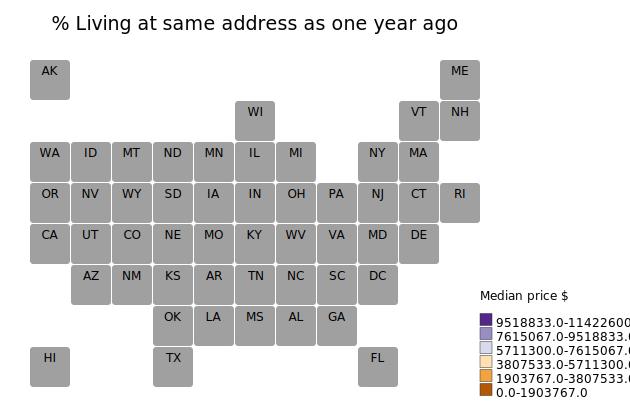

In [29]:
cg = Chorogrid('usa_states.csv', mean_price.Average, colors_by_state)
cg.set_title('% Living at same address as one year ago', font_dict={'font-size': 19})
cg.set_legend(legend_colors, legend_labels, title='Median price $')
cg.draw_squares(spacing_dict={'margin_right': 150}) # otherwise legend will be cut off
    # another strategy would be to pass a legend_offset to spacing_dict
cg.done(show=True)

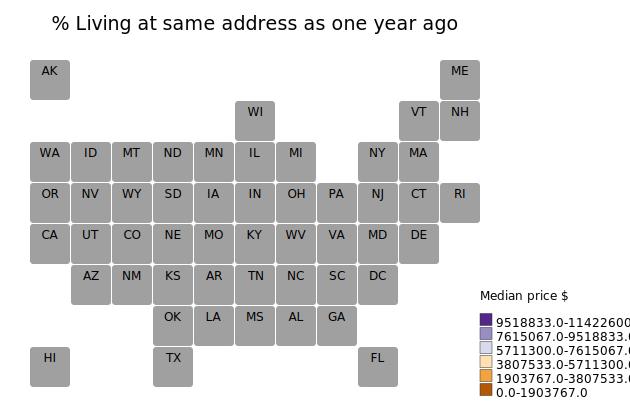

In [19]:
cg.draw_squares(spacing_dict={'margin_right': 150}, font_colors=font_colors_by_state)
cg.done(show=True)

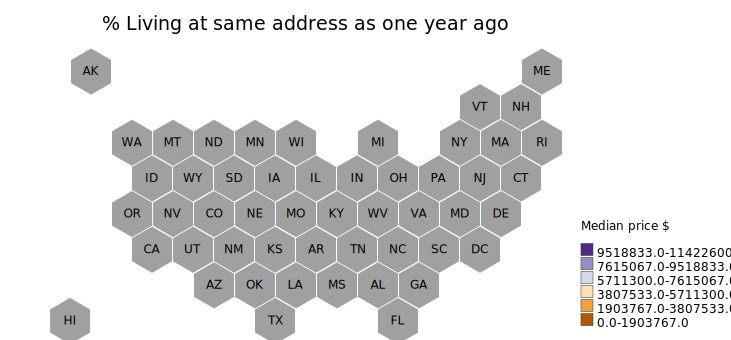

In [30]:
cg.draw_hex(spacing_dict={'margin_right': 150}, font_colors=font_colors_by_state)
cg.done(show=True)

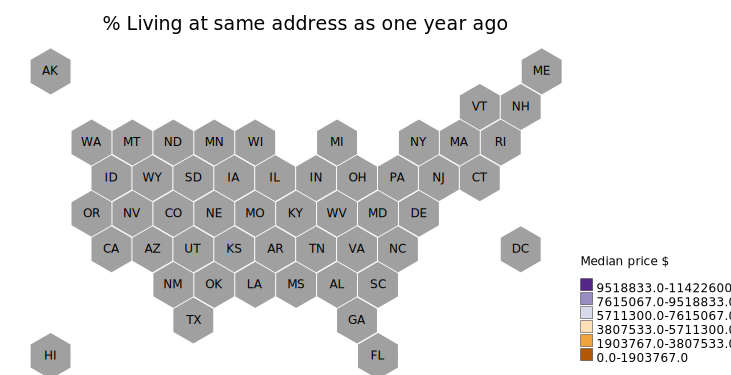

In [31]:
cg.draw_hex(x_column='althex_x', y_column='althex_y', spacing_dict={'margin_right': 150},
            font_colors=font_colors_by_state)
cg.done(show=True)

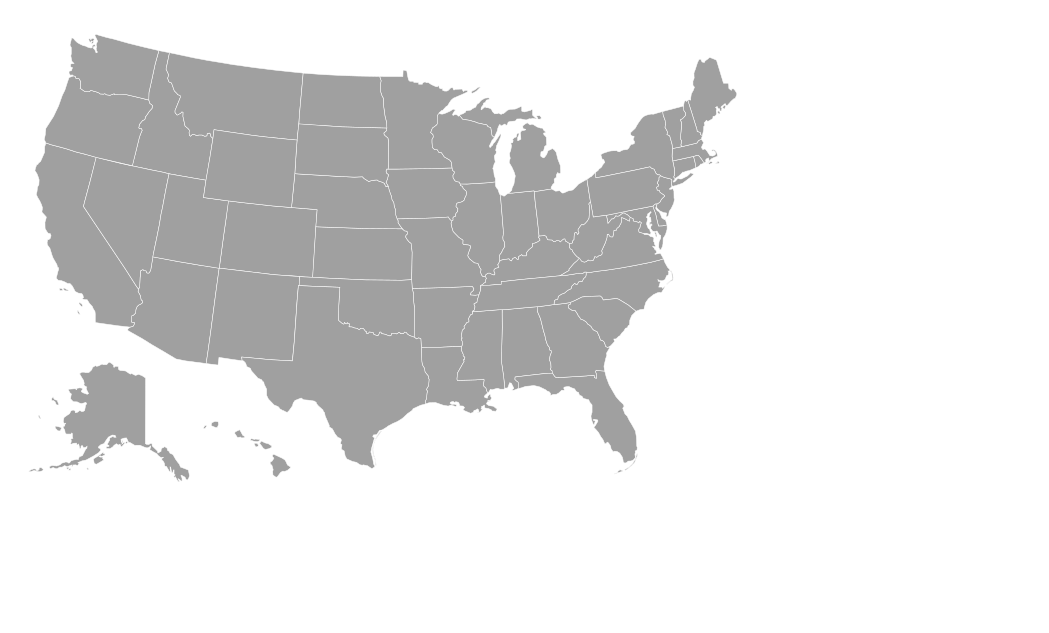

In [32]:
cg = Chorogrid('usa_states.csv', mean_price.Average, colors_by_state)
cg.draw_map(spacing_dict={'legend_offset': [-150,-25]})
cg.done(show=True)

# To Do: Add state names. The required data is there in the database, but hasn't been implemented in code.

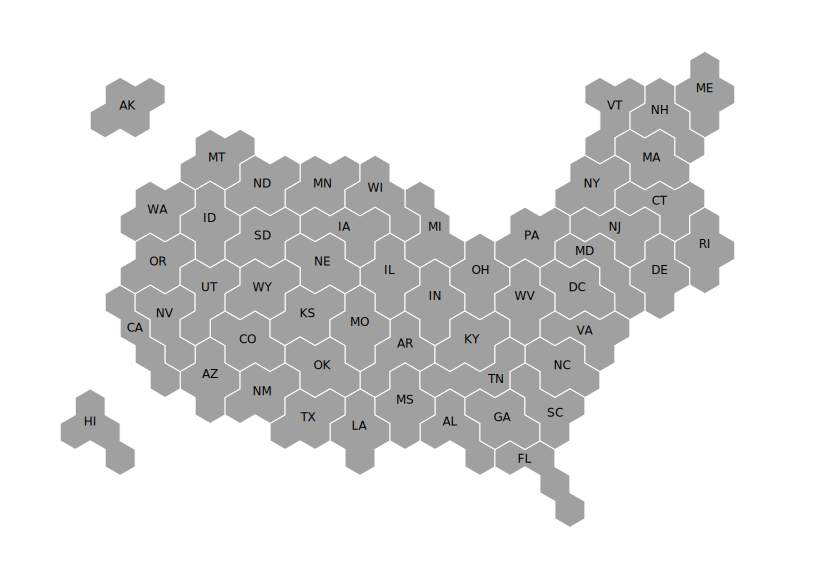

In [33]:
cg.draw_multihex()
cg.done(show=True)

In [35]:
average_price = pd.read_csv('average_prices.csv',encoding='latin-1')
#with codecs.open(tag_file, encoding='utf-8', errors='replace') as fh:

In [36]:
average_price.tail()

,CountyState,Average,RegionID
10419,"Brown, WI",171300,398292
10420,"Steuben, NY",220200,398343
10421,"Brown, WI",204100,398496
10422,"Calaveras, CA",390100,398839
10423,"Hunterdon, NJ",382600,737788


In [37]:
mybins = Colorbin(average_price['Average'], mycolors, proportional=False, decimals=None)
mybins.fenceposts

[0, 140200, 195400, 256000, 338600, 481000, 11422600]

In [38]:
mybins.fenceposts = [0, 50000, 100000, 150000, 250000, 500000, 1000000]
mybins.recalc(False)
mybins.labels

['0-50000',
 '50000-100000',
 '100000-150000',
 '150000-250000',
 '250000-500000',
 '500000-1000000']

In [39]:
with open('usa_counties_column_descriptions.txt', 'r', encoding='utf-8') as f:
    print(f.read())

name          County name, e.g. "Santa Barbara"
state         2-letter state abbreviation, e.g. CA
map_path      SVG path for county outline
fips          Federal Information Processing Standards code for county in string format, e.g. "06083"
fips_integer  Federal Information Processing Standards code for county in integer format, e.g. 6083
middle_x      horizontal coordinate of center of county; not used for anything in this script, but provided just in case it's useful
middle_y      vertical coordinate of center of county; not used for anything in this script, but provided just in case it's useful



In [40]:
# Calculate the average listing price and the variance over the time period
df['average_price'] = np.nanmean(df[prices], axis = 1)
df['price_variance'] = np.nanvar(df[prices], axis = 1)
df['size'] = df.shape[0] - df['SizeRank'] # Reverse code the size rank so larger number = larger size

In [41]:
df[['RegionName', 'State', 'average_price']].nlargest(10, 'average_price')

,RegionName,State,average_price
8494,Zwolle,LA,1.077598e+07
9805,Jupiter Island,FL,3.883831e+06
4430,Atherton,CA,3.340262e+06
8397,Rolling Hills,CA,3.328030e+06
3349,Hillsborough,CA,3.277449e+06
9364,Water Mill,NY,3.064341e+06
5941,Portola Valley,CA,3.004151e+06
4242,Los Altos Hills,CA,2.555097e+06
7837,Belvedere,CA,2.335890e+06
7357,Rancho Santa Fe,CA,2.215902e+06


In [42]:
df[['RegionName', 'State', 'average_price']].nsmallest(10, 'average_price')

,RegionName,State,average_price
5246,Wewoka,OK,29929.600000
5318,Shenandoah,PA,31084.848485
5944,Mahanoy City,PA,31139.393939
9773,Waurika,OK,33108.974359
8942,Girardville,PA,33564.000000
7046,Ashland,PA,35390.800000
4841,Century Village,FL,37204.800000
8944,Rankin,PA,37493.162393
6787,Homestead,PA,37810.683761
7470,Braddock,PA,37984.000000


In [43]:
del df['price_variance']

In [51]:
del df['size']

In [52]:
all_prices = df.columns[6:]
all_prices

Index(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01',
       ...
       '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
       '2016-09', '2016-10', '2016-11', '2016-12'],
      dtype='object', length=249)

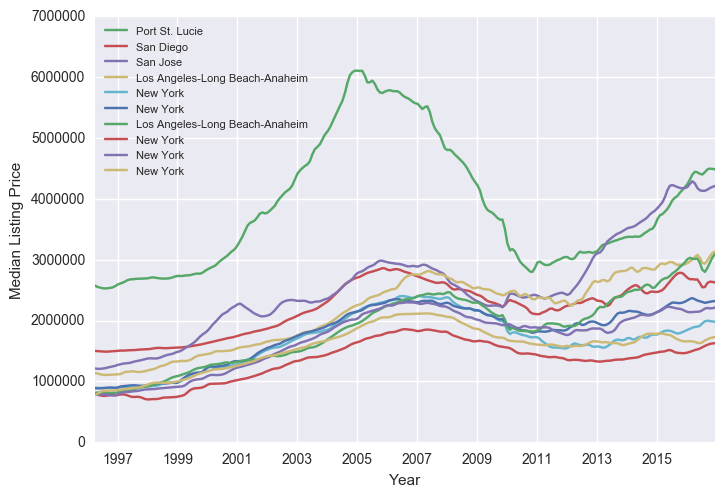

In [53]:
top10variances = df.nlargest(10,all_prices)
yearsFmt = mdates.DateFormatter('%Y')
for i in range(10):
    plt.plot_date(all_prices, top10variances.iloc[i][all_prices], 'x-')
plt.ylabel('Median Listing Price')
plt.xlabel('Year')
ax = plt.axes()
ax.xaxis.set_major_formatter(yearsFmt)
plt.legend(top10variances['Metro'], loc = 2, prop={'size':8})
plt.show()

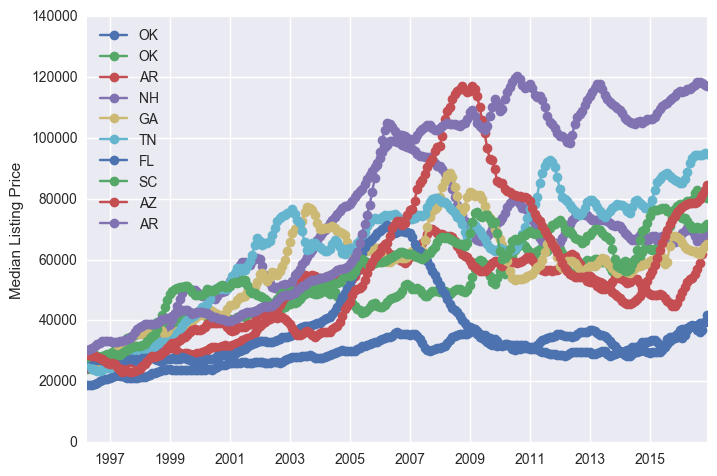

In [54]:
lowestvariances = df.nsmallest(10, all_prices)
for i in range(10):
    plt.plot_date(all_prices, lowestvariances.iloc[i][all_prices], 'o-')
plt.ylabel('Median Listing Price')
ax = plt.axes()
ax.xaxis.set_major_formatter(yearsFmt)
plt.legend(lowestvariances['State'], loc = 2, prop={'size':10})
plt.show()

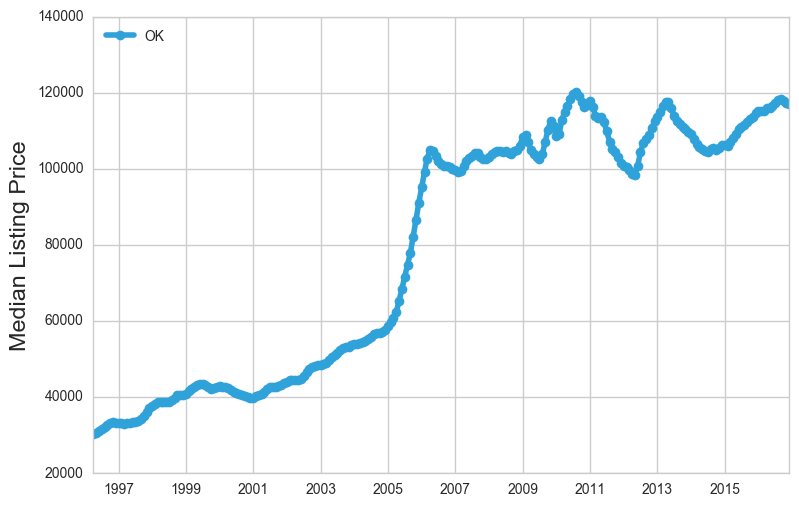

In [70]:
top10variances = df.nlargest(1, all_prices)
yearsFmt = mdates.DateFormatter('%Y')
plt.plot_date(all_prices, lowestvariances.iloc[i][all_prices], 'o-')
plt.ylabel('Median Listing Price')
ax = plt.axes()
ax.xaxis.set_major_formatter(yearsFmt)
plt.legend(lowestvariances['State'], loc = 2, prop={'size':10})
plt.show()

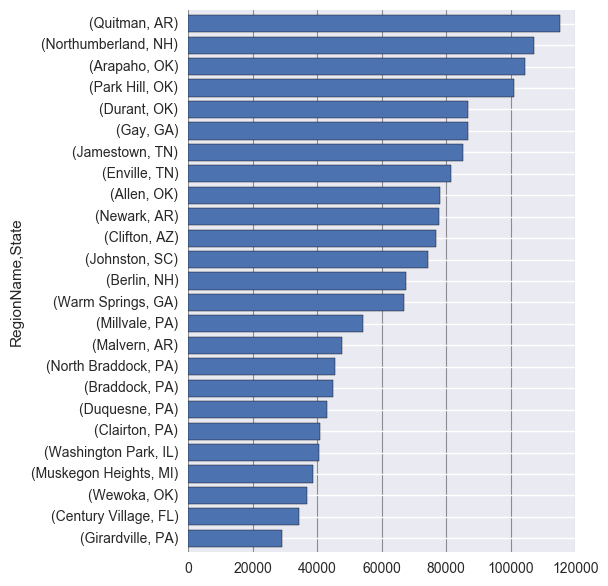

In [56]:
#Bottom 25 
pivot = pd.pivot_table(df.nsmallest(25, all_prices), index=['RegionName','State'])
pivot = pivot.T
pivot.ix['2016-01'].sort_values().plot(kind='barh', figsize=(5, 7), width=0.8, fontsize=10)
plt.grid(color='k', axis='x', alpha=0.4, lw=0.8)
#plt.xaxis.set_major_formatter(yearsFmt)
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
plt.show()

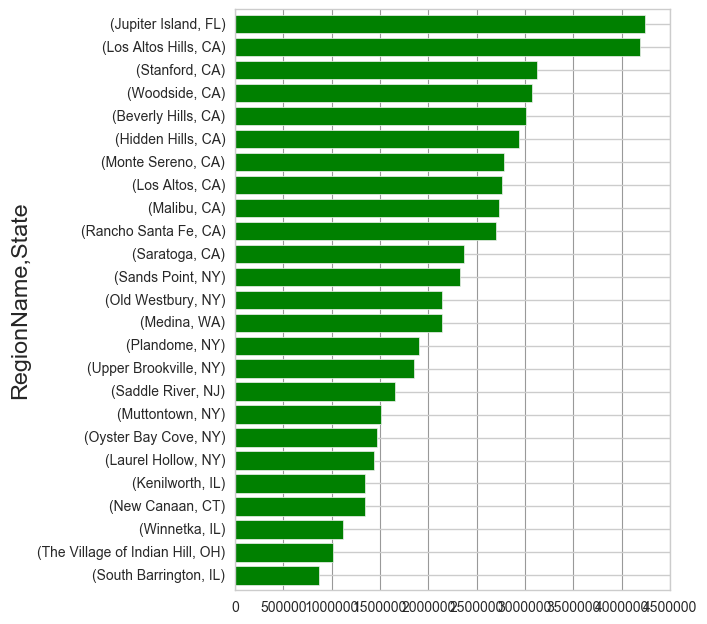

In [57]:
#Top 25 counties with largest price tag
pivot = pd.pivot_table(df.nlargest(25, all_prices), index=['RegionName','State'])
pivot = pivot.T
pivot.ix['2016-01'].sort_values().plot(kind='barh', figsize=(5, 7), width=0.8, fontsize=10,color='green')
plt.grid(color='k', axis='x', alpha=0.4, lw=0.8)
#plt.xaxis.set_major_formatter(yearsFmt)
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
plt.show()

### Exploring regions
Let's now explore the variable state. The first thing we have to do is aggregate our data frame by the State column.


In [21]:
states_df = df.groupby(['State'])
states_df

### Corelations between our data

By definition, correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other. A positive corelation shows the extent to which two variables increase or decrease in parallel, a negative corelations indicates the extent to which one variable increase as the other decreases.

For our dataset, it is imporpant to have a better understanding of the uderlying structure and characteristics of the data and leads to better intuition in knowing whether some parirs of attributes are correlated and how much.

To begin, pandas Dataframe has a .corr() function that has three various correlation coefficients: standard Person correlation coefficient, Kendall Tau correlation coefficient, and Sperman rank correlation.

#### Pearson correlation coeffiecient

This is simple method for understanding a feature's relation to the response variable. The values lies in [-1,1]

-1 meaning perfect negative correlation (as one variable increases, other         decrease)

1 meaning perfect positive correlation

0 meaning no linear correlation between the two variables

In [22]:
pearson = df.corr(method='pearson')
pearson

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,average_price,price_variance,size
RegionID,1.000000,0.049100,-0.015688,-0.014301,-0.017035,-0.017825,-0.018117,-0.018387,-0.018790,-0.019506,...,-0.032299,-0.032354,-0.032604,-0.032934,-0.033173,-0.033328,-0.033750,-0.025441,-0.032125,-0.049100
SizeRank,0.049100,1.000000,-0.102167,-0.100794,-0.101878,-0.102336,-0.102525,-0.102563,-0.102708,-0.102992,...,-0.101343,-0.101883,-0.101986,-0.101697,-0.101140,-0.100274,-0.099411,-0.076622,-0.030348,-1.000000
1996-04,-0.015688,-0.102167,1.000000,0.999772,0.999272,0.998707,0.998189,0.997779,0.997402,0.997029,...,0.903555,0.903487,0.903878,0.904393,0.904186,0.903736,0.903291,0.956532,0.739070,0.102167
1996-05,-0.014301,-0.100794,0.999772,1.000000,0.999821,0.999418,0.998983,0.998623,0.998277,0.997923,...,0.904215,0.904142,0.904528,0.905040,0.904837,0.904397,0.903960,0.956881,0.737348,0.100794
1996-06,-0.017035,-0.101878,0.999272,0.999821,1.000000,0.999855,0.999555,0.999258,0.998955,0.998630,...,0.904535,0.904466,0.904846,0.905348,0.905149,0.904714,0.904281,0.957064,0.735980,0.101878
1996-07,-0.017825,-0.102336,0.998707,0.999418,0.999855,1.000000,0.999896,0.999682,0.999420,0.999128,...,0.904539,0.904474,0.904852,0.905352,0.905163,0.904746,0.904329,0.957076,0.734822,0.102336
1996-08,-0.018117,-0.102525,0.998189,0.998983,0.999555,0.999896,1.000000,0.999919,0.999723,0.999474,...,0.904648,0.904589,0.904968,0.905468,0.905288,0.904887,0.904485,0.957105,0.734272,0.102525
1996-09,-0.018387,-0.102563,0.997779,0.998623,0.999258,0.999682,0.999919,1.000000,0.999925,0.999744,...,0.904974,0.904926,0.905307,0.905800,0.905613,0.905206,0.904801,0.957171,0.734662,0.102563
1996-10,-0.018790,-0.102708,0.997402,0.998277,0.998955,0.999420,0.999723,0.999925,1.000000,0.999930,...,0.905529,0.905481,0.905857,0.906341,0.906143,0.905722,0.905309,0.957292,0.735429,0.102708
1996-11,-0.019506,-0.102992,0.997029,0.997923,0.998630,0.999128,0.999474,0.999744,0.999930,1.000000,...,0.905558,0.905512,0.905888,0.906371,0.906177,0.905770,0.905374,0.957045,0.735466,0.102992


#### Let's back peddle a sec,
Know we got our correlation. We want to see how each input attribute is able to predict the target 'price' 

In [23]:
corr_with_target = pearson.ix[-1][:-1]

corr_with_dict_taget = corr_with_target.to_dict()

#predictive by their correlation with sale price
print("Columns \tCorrelation")
for cols in sorted(corr_with_dict_taget.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*cols))

Columns 	Correlation
SizeRank: 	-1.0
2006-05: 	0.12251914597113858
2006-06: 	0.12249511070025985
2006-04: 	0.1224714709778886
2006-07: 	0.122370815394523
2006-03: 	0.12218533715309536
2006-08: 	0.12214205949484706
2006-09: 	0.1217689682200907
2006-02: 	0.12156734863995912
2006-10: 	0.12146441243390746
2006-11: 	0.1211908177165069
2006-12: 	0.12083435099949132
2007-01: 	0.1204937149130233
2006-01: 	0.12046287367419062
2005-12: 	0.1200746991624378
2007-02: 	0.12000307937007894
2005-11: 	0.11988861783247381
2007-03: 	0.11982131523226996
2005-10: 	0.11957513442419623
2007-04: 	0.11923094065615163
2005-09: 	0.11889337292697924
2007-05: 	0.11844529739779278
2005-08: 	0.11815094536350468
2007-06: 	0.117702841970351
2005-07: 	0.11759515183171844
2005-06: 	0.11710281237196193
2007-07: 	0.11695609133267156
2005-05: 	0.11664099722905852
2007-08: 	0.11617881664475135
2005-04: 	0.11577791932759654
2005-02: 	0.11550087375402103
2007-09: 	0.11514217535913966
2005-03: 	0.11494481221461804
2005-01: 	0.

In [25]:
corr_with_target[abs(corr_with_target).argsort()[::1]]

price_variance    0.030348
RegionID         -0.049100
2011-11           0.064585
2011-10           0.064689
2011-12           0.064761
2011-09           0.065058
2012-01           0.065168
2011-08           0.065565
2012-02           0.065693
2012-03           0.065831
2011-07           0.065853
2012-04           0.066234
2011-06           0.066840
2010-07           0.067048
2012-05           0.067101
2010-05           0.067139
2010-12           0.067768
2010-06           0.067773
2011-05           0.067801
2011-01           0.067819
2010-11           0.068032
2010-10           0.068402
2012-06           0.068444
2011-04           0.068513
2011-02           0.068528
2011-03           0.068771
2010-09           0.069100
2012-08           0.069246
2012-07           0.069890
2010-08           0.069983
                    ...   
2005-04           0.115778
2007-08           0.116179
2005-05           0.116641
2007-07           0.116956
2005-06           0.117103
2005-07           0.117595
2

--> Let's also understand the correlation between attribute pairs

In [26]:
#get all attrs expect target
attrs = pearson.iloc[:-1,:-1]
#It's important to target correlations only
threshold = 0.5
another_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()
unique_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), another_corrs[key])
for key in another_corrs])), columns=['Attribute Pair', 'Correlation'])
unique_corrs = unique_corrs.ix[abs(unique_corrs['Correlation']).argsort()[::-1]]
unique_corrs

,Attribute Pair,Correlation
17069,"(2016-02, 2016-03)",0.999959
3643,"(2014-01, 2014-02)",0.999958
24095,"(2016-01, 2016-02)",0.999957
7407,"(2014-02, 2014-03)",0.999955
27432,"(2014-11, 2014-12)",0.999953
11658,"(2015-10, 2015-11)",0.999953
23768,"(2011-11, 2011-12)",0.999952
25311,"(2015-11, 2015-12)",0.999952
22590,"(2016-03, 2016-04)",0.999951
25790,"(2015-09, 2015-10)",0.999951


### Time to see what we have done!

Let's see the above cells with some graphs. We can try on 2d matrix first.

In [27]:
!pip install seaborn

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
import seaborn as sns

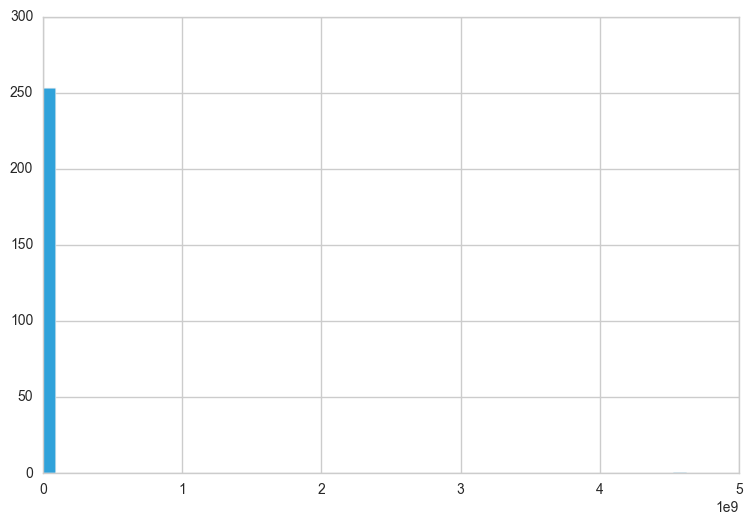

In [29]:
target = df.mean()
plt.hist(target,bins=50)
plt.show()

To understand the data more clear, we can use the displot() function, which offers a smoothed histogram with a kernal density estimation.

C:\Users\Saleban\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


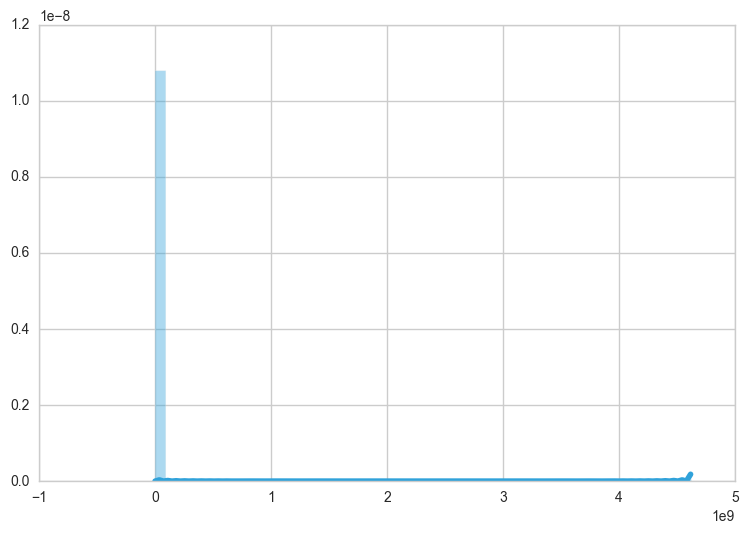

In [30]:
sns.distplot(target)
plt.show()

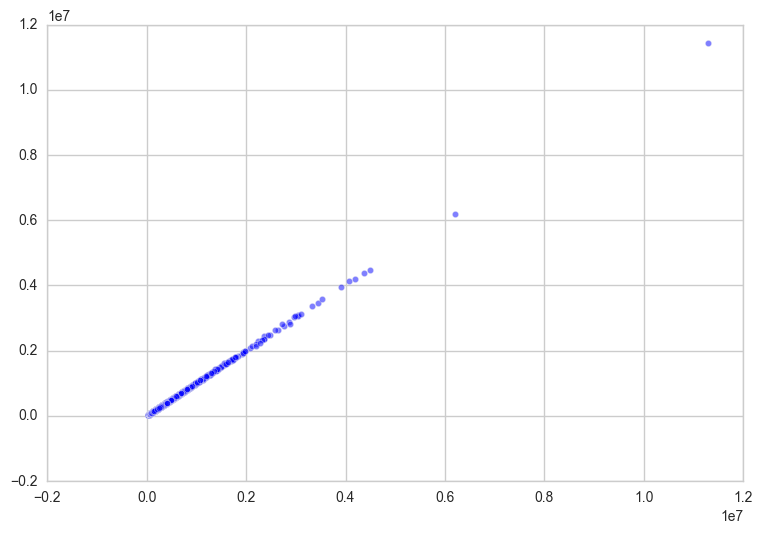

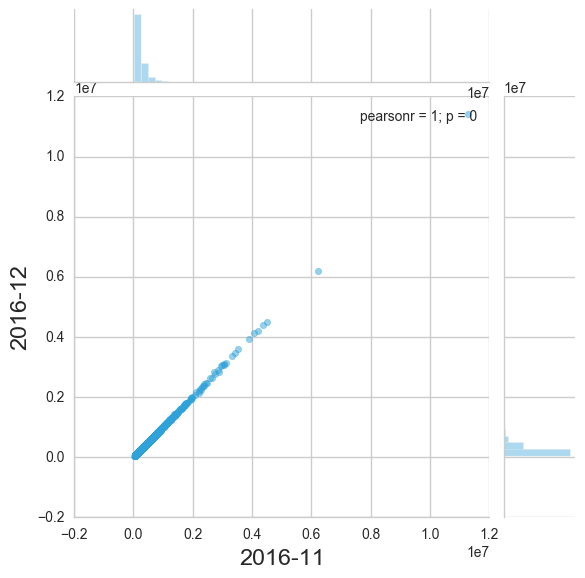

In [31]:
#scatter plot
x, y = df['2016-11'], df['2016-12']
plt.scatter(x,y,alpha=0.5)

#jointplot with histograms 
sns.jointplot(x,y,kind='scatter',joint_kws={'alpha':0.5})
plt.show()